**SOUTH AFRICAN LANGUAGE IDENTIFICATION**

In this notebook we'll walk throught the process of identifying South African Languages using **Logistic Regression Model** algorithm and **Bag of Words** representation.

# Notebook Content
1. Start Environment
    * Launching a comet experiment
    * Importing Libraries
    * Importing Datasets
2. Note on Logistic Regression
3. Dataset Preview
    * Frequency Distributions with NLTK
    * Word Cloud by Language
4. Preprocessing
    * Cleaning Links
    * Cleaning Everything Except Alphabetical and Numerical Characters
    * Tokenizing and Lemmatizing
    * Removing Stopwords
    * Joining Prepared Strings
    * Bag of Words Approach
5. Logistic Regression Model
    * Fitting LGR Model with SKLearn
    * Testing Model
    * Save as Pickle File for Web Deployment
6. Conclusion


**1. START ENVIRONMENT**

In [1]:
# Comet installation for Jupyter Notebook/Collab
!pip install comet_ml

# NLTK installation
!pip install nltk

# Keras installation
!pip install keras

# WordCloud installation
!pip install wordcloud

# Imbalanced learn installation
!pip install imbalanced-learn
#conda install -c conda-forge imbalanced-learn
#conda install -c glemaitre imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.6/446.6 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.2/498.2 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=dd7f28692e2a9d8e8f49c270213043ea7d6932584f1d06a9a8bb64986527765a
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


**Launch on Comet.ml**

Comet enables data scientists and teams to track, compare, explain and optimize experiments and models across the model’s entire lifecycle. From training to production. With just two lines of code, you can start building better models today. Read more on https://deepnote.com/docs/cometml

In [2]:
import comet_ml
from comet_ml import Experiment
# Create an experiment with your api key
experiment = Experiment(api_key="0OtUYYV7jtn1n7sGnWHtAbGb5",
                        project_name="South African Language Identification",
                        workspace="oboho-etuk")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/kaggle/working' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/oboho-etuk/south-african-language-identification/0df9f6ed41e445a6969c9fce336b2443



**Import Python Libraries**

We consider the need for the following libraries, however we may not use all.
1. data manipulation and visualization
2. collecting experiment parameters
3. preprocessing of data
4. sklearn models
5. performance libraries
6. pickle library

In [3]:
# Libraries for data loading, data manipulation and data visulisation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline
import math

# Libraries for collecting experiment parameters
import warnings
warnings.filterwarnings("ignore")
import comet_ml
from comet_ml import Experiment

# Libraries for preprocessing of text data
# Libraries for data engineering and model building
import string
import re
import nltk
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Libraries for Classifier Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Libraries for model performance (metrics)
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import math
import time
import datetime as dt
from sklearn.metrics import r2_score

# Import pickle to be able to run on web
import pickle

**Load Datasets**

In [43]:
df_train = pd.read_csv('/kaggle/input/sa-language-class-datasets/train_set.csv')
df_test = pd.read_csv('/kaggle/input/sa-language-class-datasets/test_set.csv')
# Dataset is now stored in a Pandas Dataframe
sample_sub =pd.read_csv('/kaggle/input/sample-submission/sample_submission.csv')

In [44]:
sample_sub.tail()

,index,lang_id
0,1,tsn
1,2,nbl


**3. Datasets Preview**

In [5]:
# Dataset Matrix
print("The Shape of the Train Dataset: ",df_train.shape)
print("The Shape of the Test Dataset: ",df_test.shape)
print('\n')

# Data Types and Non-null count 
print("The Column Types and Non-nulls of Train Dataset: ",df_train.info())
print('\n')

# Confirm the null count
print("The Null Count of the Train Dataset: ",df_train.isnull().sum())
print('\n')

# View top of datasets, train set
print("TOP VIEW OF TRAIN DATASET")
df_train.head()

The Shape of the Train Dataset:  (33000, 2)
The Shape of the Test Dataset:  (5682, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
The Column Types and Non-nulls of Train Dataset:  None


The Null Count of the Train Dataset:  lang_id    0
text       0
dtype: int64


TOP VIEW OF TRAIN DATASET


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [7]:
# looking at the test set
print("TOP VIEW OF TEST DATASET")
df_test.tail()

TOP VIEW OF TEST DATASET


,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


**2. Note on Logistic Regression**

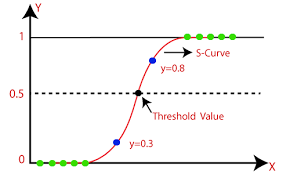
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. 

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. Read more https://www.techtarget.com/searchbusinessanalytics/definition/logistic-regression#:~:text=Logistic%20regression%20is%20a%20statistical,or%20more%20existing%20independent%20variables.

**Data Overview**

* There are 11 South African Languages

In [8]:
print("Number of SA languages: ",len(df_train.lang_id.value_counts()))
print('\n')
df_train.lang_id.value_counts()

Number of SA languages:  11




xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

* It is observed that we have balanced dataset. All responses are equal (3000 each)

**Resampling/Reducing The Data**

In [9]:
df_train=df_train.sample(n=15000)

df_train=df_train[:11001]

**Dataset Statistics**

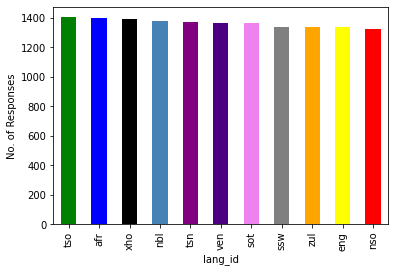

In [10]:
# Exploring our class description - the categorical variable lang_id

type_labels = list(df_train.lang_id.unique())

df_train.lang_id.value_counts().plot(
    kind = 'bar', 
    color=['green','blue','black','steelblue','purple',
           'indigo','violet','grey' , 'orange', 
           'yellow', 'red'])
plt.xlabel('lang_id')
plt.ylabel('No. of Responses')
plt.show()

In [11]:
df_train.describe()

,lang_id,text
count,15000,15000
unique,11,14324
top,tso,sibawa abafakazeli ababili esingakghona ukubat...
freq,1404,7


We can view the 10 most occurring words with horizontal bar chart and pie chart

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 10')

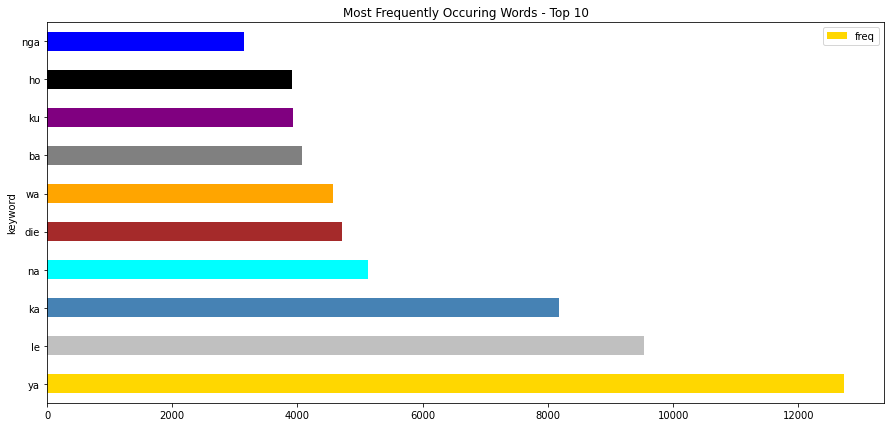

In [12]:
# instantiate CountVectorizer
word_vect = CountVectorizer(stop_words = 'english')
keywords = word_vect.fit_transform(df_train.text)

total_words = keywords.sum(axis=0)

keywords_freq = [(keyword, total_words[0, i]) for keyword, i in word_vect.vocabulary_.items()]
keywords_freq = sorted(keywords_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(keywords_freq, columns=['keyword', 'freq'])
colors = ['gold', 'silver', 'steelblue','cyan','brown','orange','grey',
         'purple','black','blue']

frequency.head(10).plot(x='keyword', y='freq', kind='barh', figsize=(15, 7), color = colors)
plt.title("Most Frequently Occuring Words - Top 10")

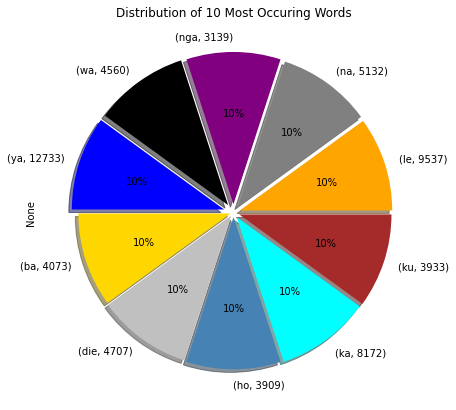

In [13]:
# Defining colors for the pie chart
colors = ['gold', 'silver', 'steelblue','cyan','brown','orange','grey',
         'purple','black','blue']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065)
pie_plot=frequency.head(10).value_counts().plot(kind = 'pie',\
                                                   autopct='%1.0f%%',\
                                                   colors=colors,explode=explode,\
                                                   shadow = True,
          startangle = 180,figsize=(7,7))
  
# displaying chart
pie_plot.set_title("Distribution of 10 Most Occuring Words")
plt.show()

**Word Cloud of Each Language ID**
* We can collect word via our Word Cloud function that takes two arguments: dataframe and specific lang_id (lang_id as a string)

In [14]:
def word_cloud(df, label):
    # extract keywords according to news sentiments==2
    df_keywords = df['text'][df['lang_id']==label]
    new_df = pd.DataFrame(df_keywords)

    word_vect = CountVectorizer(stop_words = 'english')
    keywords = word_vect.fit_transform(new_df.text)
    total_words = keywords.sum(axis=0)

    keywords_freq = [(keyword, total_words[0, i]) for keyword, i in word_vect.vocabulary_.items()]
    keywords_freq = sorted(keywords_freq, key = lambda x: x[1], reverse = True)
    frequency = pd.DataFrame(keywords_freq, columns=['keyword', 'freq'])

    kw_cloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(str(keywords_freq))
    
    x, y = np.ogrid[:300, :300]
    mask = (x - 160) ** 2 + (y - 160) ** 2 > 170 ** 2
    mask = 255 * mask.astype(int)

    plt.figure(figsize=(10,8))
    b = plt.imshow(kw_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(label, fontsize = 20)

    return b

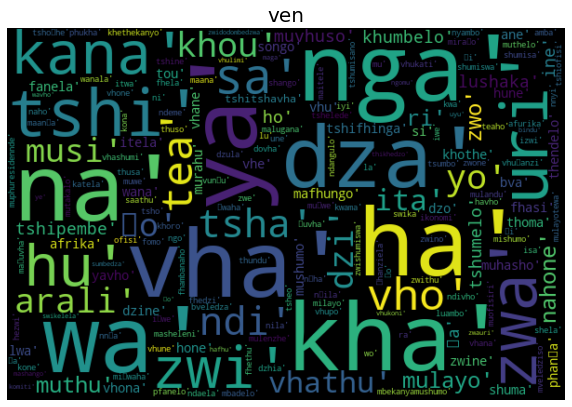

In [15]:
word_cloud(df_train, 'ven')

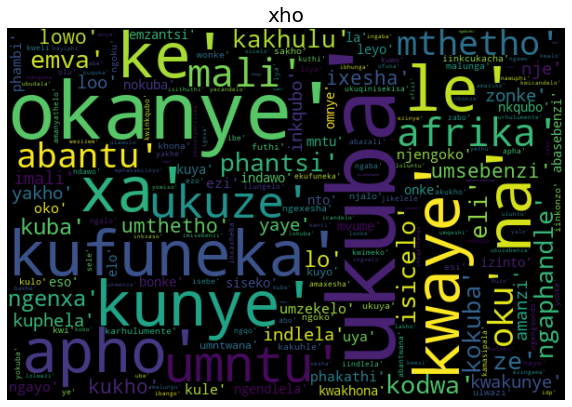

In [16]:
word_cloud(df_train,'xho')

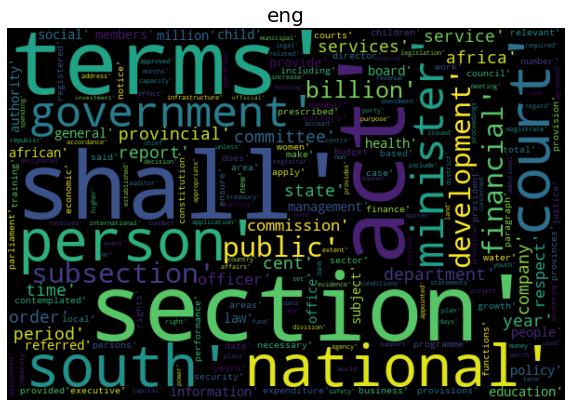

In [17]:
word_cloud(df_train, 'eng')

**4. Preprocessing**
* Cleaning urls and all website links using regular expressions
* Keeping relevant Alphabetical and Numerical Characters
* Tokenize and Lemmatize text
* Remove Stopwords
* Re-join the text words
* Create a bag of words for our model

In [18]:
df_train['lang_id'].unique()

array(['nbl', 'tso', 'sot', 'tsn', 'nso', 'ssw', 'eng', 'xho', 'afr',
       'zul', 'ven'], dtype=object)

In [19]:
def assignNewLabels(label):
    if label=='xho':
        return 1
    if label=='eng':
        return 2
    if label=='nso':
        return 3
    if label=='ven':
        return 4
    if label=='tsn':
        return 5
    if label=='nbl':
        return 6
    if label=='zul':
        return 7
    if label=='ssw':
        return 8
    if label=='tso':
        return 9
    if label=='sot':
        return 10
    if label=='afr':
        return 11

In [20]:
df_train['lang_id_num']=df_train['lang_id'].apply(assignNewLabels)

In [21]:
df_train.head()

,lang_id,text,lang_id_num
11078,nbl,ukubhalelwa kuzalisa iimfuneko zomthetho ophat...,6
11641,tso,ntirho wa mina ku kala ndzi nga ngheneleli kum...,9
3087,sot,maikemisetso a gsssd ke ho rala ho thusa le ho...,10
14907,tsn,sekgatshi se se ke sa phepafadiwa le go tlamel...,5
27946,nso,bala gape gomme a phošolle sehlangwa ka go dir...,3


In [22]:
# create a function to do some preprocessing on the data
def clean_message(message):
    '''
    :parameter
        :param message: str - name of column containing text to be cleaned
    :return
        cleaned message
    '''
    # remove the noise - urls, change to lower case, then strip
    # print ('Lowering case, stripping whitespace and removing URLs...')
    message = re.sub(
        'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+',
        '', str(message).lower().strip())
    
    # remove usernames and hashtags
    # print ('Removing usernames and hashtags...')
    message_list = message.split()
    message = re.sub('(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', 
                     '', message)
    
    # remove numbers and confirming words
    message = re.sub('[\d+]|[^\w\s]', '', message)
            
    # remove punctuations
    # print ('Cleaning punctuation...')
    punct = string.punctuation
    message_list = [word for word in message_list if word not in punct]
     
    # complete step, return string, remove duplicates with the set() function,
    message = " ".join(message_list)     # join words back to string from list
    message = " ".join(set(message.split()))    # split string, then remove duplicate words
    
    return message

In [23]:
# make a copy of the train dataset to pass through the preprocessing 
df1 = df_train.copy()
df1["new_text"] = df1["text"].apply(lambda x: clean_message(x))

# get train corpus to use in vectorizer for feature extraction
train_corpus = df1['new_text'] # pass new column containing clean words from tweets to a variable
train_label = df1['lang_id_num'] # pass label column to a variable

In [24]:
# make a copy of test dataset to pass through the same preprocessing
df2 = df_test.copy()
df2["new_text"] = df2["text"].apply(lambda x: clean_message(x))

# get test corpus to use in vectorizer for feature extraction
test_corpus = df2['new_text'] # new column containing words from cleaned tweet message

In [25]:
# view a subset of the cleaned train messages
train_corpus.head()

11078    uwubuyise umrholo owuthole ungawuthathi zomthe...
11641    munhu khongela a yona tsakelaka amukela ku van...
3087     fihlella a gsssd ho mekgwa kgontsha tshebetson...
14907    di saletseng se diragala ga gammogo tse sekgat...
27946    tshwanelo a bala polelo motheo tšweletšotsenel...
Name: new_text, dtype: object

In [26]:
test_corpus.tail()

5677                     ballot you in mark your private.
5678    tefelo hlwahlwa mofani a šomišitše gems. goba ...
5679    ntle ena hloko, hobane boto ho kopo na tumello...
5680    lefella ho sheba leha ditsing lena. fumana kal...
5681                iwebhusayidi yethu ku-www. vakatjhela
Name: new_text, dtype: object

In [27]:
# create a function to preprocess data for our models
def preprocess_train_split(corpus):
    '''
    :parameter
        :corpus str - the cleaned string of tweets from the column of the dataframe
    :return
        split of features and label in the train and validation sets
    '''
    # define features and target/label components of the dataset
    features = corpus
    label = train_label.astype(int) # ensure label is read as integer
    
    # split train data into train and validation datasets
    X_train, X_valid, y_train, y_valid = train_test_split(features, 
                                                    label, 
                                                    test_size=0.25, 
                                                    random_state=1)
        
    return (X_train, y_train), (X_valid, y_valid)

In [28]:
# splitted train dataset into training and validation sets
(X_train, y_train), (X_valid, y_valid) = preprocess_train_split(train_corpus)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape) 

(11250,)
(11250,)
(3750,)
(3750,)


In [29]:
# define the X_test
X_test = test_corpus

In [30]:
def vectorise(X_train, X_valid, X_test):
    '''
    :parameter
        :document str - the cleaned string of text documents from the datasets
    :return
        vectorized variables in the train, validation and test datasets
    '''
    # create global variable of the vectorizer
    global tf_vect
    
    # define vectorizer object using the term frequency–inverse document frequency (Tfidf)
    #count_vect = CountVectorizer(max_features = 150, ngram_range=(1,2))
    #tf_vect = TfidfVectorizer(max_features=8500, max_df=0.2, ngram_range=(1,2), 
     #                         strip_accents='ascii', smooth_idf=False)
    tf_vect = TfidfVectorizer()
    
    # vectorise with fit_transform on training sets and transform on test set
    train_vect = tf_vect.fit_transform(X_train).toarray()
    valid_vect = tf_vect.transform(X_valid).toarray()
    test_vect = tf_vect.transform(X_test).toarray()
    
    # standardize the features to be in comparable scale
    rs = RobustScaler()
    mm = MinMaxScaler()
    train_vect = rs.fit_transform(train_vect)
    train_vect = mm.fit_transform(train_vect)
    
    valid_vect = rs.fit_transform(valid_vect)
    valid_vect = mm.fit_transform(valid_vect)
    
    test_vect = rs.fit_transform(test_vect)
    test_vect = mm.fit_transform(test_vect)
    
    return train_vect, valid_vect, test_vect

In [31]:
# call function for vectorizing train, validation and test datasets
X_train_vt, X_valid_vt, X_test_vt, = vectorise(X_train, X_valid, X_test)
print(X_train_vt.shape)
print(y_train.shape)
print(X_valid_vt.shape)
print(y_valid.shape)
print(X_test_vt.shape)

(11250, 75828)
(11250,)
(3750, 75828)
(3750,)
(5682, 75828)


In [32]:
# Check the top features that were created and vectorised
# Best 150 features
tf_vect.get_feature_names_out(X_train_vt)

array(['aa', 'aabameli', 'aaent', ..., 'ṱuṱuwedzea', 'ṱuṱuwedzwa',
       'ṱuṱuwedzwe'], dtype=object)

In [33]:
# check to confirm the value_counts in each class
# of the training dataset BEFORE resampling
unique, counts = np.unique(y_train, return_counts=True)
counts

array([1029,  982,  972, 1030, 1045, 1047, 1025,  999, 1041, 1034, 1046])

**5. Logistic Regression Model**

In [34]:
# run a Logistic Regression base model on the standard dataset
lgr_base = LogisticRegression() # instantiate model object
lgr_train = lgr_base.fit(X_train_vt, y_train) #fit model to unbalanced data
lgr_predict = lgr_train.predict(X_valid_vt) # make prediction on validation dataset
lgr_predict_test = lgr_train.predict(X_test_vt) # make prediction on no_labels test dataset

# print classification report
print(classification_report(y_valid, lgr_predict))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       364
           2       1.00      1.00      1.00       353
           3       1.00      1.00      1.00       349
           4       1.00      1.00      1.00       335
           5       1.00      1.00      1.00       324
           6       1.00      0.98      0.99       331
           7       0.99      0.98      0.99       312
           8       0.99      1.00      1.00       338
           9       1.00      1.00      1.00       363
          10       1.00      1.00      1.00       329
          11       1.00      0.99      1.00       352

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [35]:
# define the confusion matrix
labels=['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr']
c_matrix_lgr_base = pd.DataFrame(data=
                               confusion_matrix(y_valid, lgr_predict), 
                               index=labels,columns=labels)
# print confusion matrix
c_matrix_lgr_base

,xho,eng,nso,ven,tsn,nbl,zul,ssw,tso,sot,afr
xho,362,0,0,0,0,0,2,0,0,0,0
eng,0,353,0,0,0,0,0,0,0,0,0
nso,0,0,348,0,1,0,0,0,0,0,0
ven,0,0,0,335,0,0,0,0,0,0,0
tsn,0,0,1,0,323,0,0,0,0,0,0
nbl,3,0,0,0,0,326,2,0,0,0,0
zul,2,0,0,0,0,1,307,2,0,0,0
ssw,0,0,0,0,0,0,0,338,0,0,0
tso,0,0,0,0,0,0,0,0,363,0,0
sot,0,0,0,0,0,0,0,0,0,329,0


**Model Fitting, Training and Predictions of the Text Classes with unseen datasets**

The first step of modeling involved fitting, training and predicting a base model of Logistic Regression on the original, unbalanced dataset. The classification report as well as the confusion matrix, two of the metrics for measuring model performance will be briefly discussed (these metrics will be further discussed in the subsequent sub-section on Model Performance).

**Submit Our Result on Kaggle**

In [36]:
#create a Kaggle submission file for the model
results_dict = pd.DataFrame({'index':df_test.index,
                'lang_id': lgr_predict_test})

In [37]:
results_dict.head()

,index,lang_id
0,0,8
1,1,6
2,2,4
3,3,8
4,4,8


In [38]:
results_dict.tail()

,index,lang_id
5677,5677,8
5678,5678,3
5679,5679,10
5680,5680,10
5681,5681,8


In [39]:
results_dict.to_csv('submission.csv', index = False)

**Save on Pickle for Web Deployment**

We also want to be able to deploy on the web

In [40]:
# pickle/save base model for Streamlit web deployment
model_save_path = "lgr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lgr_train,file)

**Time to end our experiment**

In [41]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/oboho-etuk/south-african-language-identification/0df9f6ed41e445a6969c9fce336b2443
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : 1
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     neg_label         : 0
COMET INFO:     norm              : l2
COMET INFO:     penalty           : l2
COMET INFO:     pos_label         : 1
COMET INFO: 

**Display Experiment for View**

In [42]:
experiment.display()

**6. Conclusion**